# Prediction

## Read Data


In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=20,10


In [2]:
df = pd.read_csv('velo.csv')

# url='https://docs.google.com/spreadsheets/d/1ssxsl9AIobDofXFohvwxqCPF0tn6dgXpixhiDzus0iE/export?format=csv&gid=59478853'
# path_target = "./velo.csv"
# df = pd.read_csv(url)


In [3]:
df.head()

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total,Unnamed: 4,Remarque
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,12/03/2020,11:05:00,109.0,109.0,NaN,NaN
3,12/03/2020,14:30:00,441.0,441.0,NaN,NaN
4,13/03/2020,10:02:00,1921.0,385.0,NaN,NaN


In [4]:
df.tail(10)

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total,Unnamed: 4,Remarque
1367,06/03/2021,09:16:00,71895.0,81.0,NaN,NaN
1368,06/03/2021,09:24:00,71910.0,96.0,NaN,NaN
1369,06/03/2021,10:01:00,71948.0,134.0,NaN,NaN
1370,06/03/2021,14:25:00,72377.0,563.0,NaN,NaN
1371,06/03/2021,18:08:00,72761.0,947.0,NaN,NaN
1372,07/03/2021,12:20:00,73146.0,233.0,NaN,NaN
1373,07/03/2021,12:58:00,73237.0,324.0,NaN,NaN
1374,07/03/2021,14:45:00,73319.0,406.0,NaN,NaN
1375,07/03/2021,18:15:00,73529.0,616.0,NaN,NaN
1376,08/03/2021,10:19:00,74035.0,414.0,NaN,NaN


On a juste besoin que des 4 premières colonnes, les deux dernières ne contiennent aucune information

In [5]:
df = df[['Date', 'Heure / Time', 'Vélos depuis le 1er janvier / Grand total', "Vélos ce jour / Today's total"]]
df.tail()

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total
1372,07/03/2021,12:20:00,73146.0,233.0
1373,07/03/2021,12:58:00,73237.0,324.0
1374,07/03/2021,14:45:00,73319.0,406.0
1375,07/03/2021,18:15:00,73529.0,616.0
1376,08/03/2021,10:19:00,74035.0,414.0


On va renommer les colonnes du dataframe

In [6]:
df.rename(columns = {'Heure / Time': 'Time', 'Vélos depuis le 1er janvier / Grand total' : 'Total', "Vélos ce jour / Today's total" : "TodayTotal"}, inplace = True)

In [7]:
df.tail()

,Date,Time,Total,TodayTotal
1372,07/03/2021,12:20:00,73146.0,233.0
1373,07/03/2021,12:58:00,73237.0,324.0
1374,07/03/2021,14:45:00,73319.0,406.0
1375,07/03/2021,18:15:00,73529.0,616.0
1376,08/03/2021,10:19:00,74035.0,414.0


## Data Types 

In [8]:
df.dtypes

Date           object
Time           object
Total         float64
TodayTotal    float64
dtype: object

On va convertir le data type de 'Date' (object) en datetime type

In [9]:
df["Date"] = pd.to_datetime(df.Date)
#df['Time'] = df.astype({'Time': float})



In [10]:
df.dtypes

Date          datetime64[ns]
Time                  object
Total                float64
TodayTotal           float64
dtype: object

In [11]:
df.tail()

,Date,Time,Total,TodayTotal
1372,2021-07-03,12:20:00,73146.0,233.0
1373,2021-07-03,12:58:00,73237.0,324.0
1374,2021-07-03,14:45:00,73319.0,406.0
1375,2021-07-03,18:15:00,73529.0,616.0
1376,2021-08-03,10:19:00,74035.0,414.0


In [12]:
df.index = df['Date']

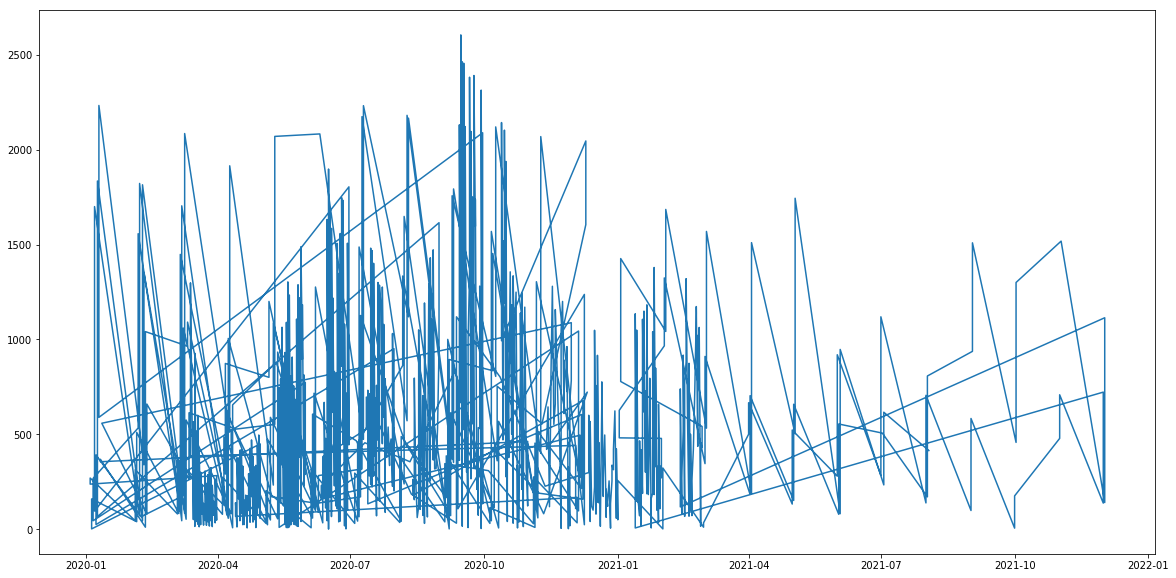

In [13]:
plt.plot(df["TodayTotal"], label='')
#plt.xlim([1200, 1300])
plt.show()


In [14]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date','TodayTotal'])
for i in range(0,len(data)):
    data["Date"][i]=df['Date'][i]
    data["TodayTotal"][i]=df["TodayTotal"][i]
data.head()

,Date,TodayTotal
0,2020-01-04 00:00:00,237
1,2020-01-04 00:00:00,269
2,2020-01-05 00:00:00,7
3,2020-01-05 00:00:00,1
4,2020-01-05 00:00:00,13
